In [84]:
# find -name '*.txt' -exec basename {} \; > list.txt

# Start

## Import Library

In [85]:
import os, re 
import numpy as np
import tensorflow as tf

In [86]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

## 데이터 불러오기

가사 모음집을 가져옵니다.

In [87]:
lyric_list_path = '/content/drive/MyDrive/Data/list.txt'
with open(lyric_list_path, "r") as f:
    # 읽어온 파일을 splitlines() 함수로 줄 단위로 문자열을 리스트로 저장
    lyric_list = f.read().splitlines()

# 앞에서부터 10라인만 화면에 출력해 볼까요?
print(lyric_list[:])

['prince.txt', 'dickinson.txt', 'notorious-big.txt', 'beatles.txt', 'bob-dylan.txt', 'bjork.txt', 'johnny-cash.txt', 'disney.txt', 'janisjoplin.txt', 'kanye.txt', 'bob-marley.txt', 'leonard-cohen.txt', 'ludacris.txt', 'adele.txt', 'alicia-keys.txt', 'joni-mitchell.txt', 'amy-winehouse.txt', 'lorde.txt', 'rihanna.txt', 'Kanye_West.txt', 'nirvana.txt', 'cake.txt', 'bieber.txt', 'notorious_big.txt', 'missy-elliott.txt', 'dolly-parton.txt', 'jimi-hendrix.txt', 'michael-jackson.txt', 'al-green.txt', 'lil-wayne.txt', 'lady-gaga.txt', 'lin-manuel-miranda.txt', 'nursery_rhymes.txt', 'dj-khaled.txt', 'radiohead.txt', 'patti-smith.txt', 'blink-182.txt', 'Lil_Wayne.txt', 'dr-seuss.txt', 'r-kelly.txt', 'drake.txt', 'britney-spears.txt', 'bruce-springsteen.txt', 'nicki-minaj.txt', 'kanye-west.txt', 'paul-simon.txt', 'nickelback.txt', 'eminem.txt', 'bruno-mars.txt']


## Preprocessing

### step1.말뭉치 만들기

In [88]:
raw_corpus = [] # 전처리 이전 말뭉치 리스트 생성
for i in lyric_list:
   path_lyric = '/content/drive/MyDrive/Data/lyrics/' + i
   with open(path_lyric,"r") as f:
        raw = f.read().splitlines()
        # extend 메서드 리스트 끼리 더할 때 사용
        raw_corpus.extend(raw)
print(raw_corpus[-9:])

['No one can do me the way you do', "It's always been you", "I'm all about you Oh oh oh oh oh oh oh oh", "I'm all about you", 'Oh oh oh oh oh oh oh oh', "I'm all about you", 'Oh oh oh oh oh oh oh oh', "I'm all about you girl", 'Oh oh oh oh oh oh oh oh ']


In [89]:
len(raw_corpus)

187088

말뭉치를 대충 알아보기

In [90]:
for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: continue   
    # 길이가 0인 문장은 건너뜁니다.
    if sentence[-1] == ":": continue  # 문장의 끝이 : 인 문장은 건너뜁니다.

    if idx > 9: break   # 문장 10개만 확인
    print(sentence)
    print(type(sentence))

All of this and more is for you
<class 'str'>
With love, sincerity and deepest care
<class 'str'>
My life with you I share
<class 'str'>
Ever since I met you, baby
<class 'str'>
I've been wantin' to lay you down
<class 'str'>
But it's so hard to get you
<class 'str'>


In [91]:
lenght_sentence = []
for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: continue   
    if sentence[-1] == ":": continue  # 문장의 끝이 : 인 문장은 건너뜀
    lenght_sentence.append([idx,len(sentence)]) #문장의 길이 측정 및 저장

In [92]:
len(lenght_sentence) # 대충 정제한 후 문장개수

175749

In [93]:
lenght_sentence = np.array(lenght_sentence) #문자열 길이list를 ndarray로 변환

In [94]:
lenght_sentence.shape

(175749, 2)

In [95]:
lenght_sentence # raw_corpus에서 인덱스와 문자열 길이를 반환

array([[     2,     31],
       [     3,     37],
       [     4,     24],
       ...,
       [187085,     23],
       [187086,     22],
       [187087,     24]])

In [96]:
index_r = np.argmax(lenght_sentence,axis = 0) #최댓값이 들어있는 위치 찾기
print(index_r)

[175748  91284]


[175748 91284]에서 첫 번째 열은 인덱스의 크기가 위치한 행 이므로 제외하고 , 두번째 열은 문자열 길이를 나타내므로 제일 긴 문장은 91284 행에 위치합니다.

In [97]:
lenght_sentence[175748,]

array([187087,     24])

In [98]:
lenght_sentence[91284,]  # ...? 1465글자...?

array([98199,  1465])

가장 긴 문자열이 들어있는 raw_corpus의 위치는 98199 번째 인덱스입니다. 이정도면 가사 전체를 한번에 넣은거 같은 크깁니다.

In [99]:
raw_corpus[98199]

"WRITERS RUSSELL BROWN, IRWIN LEVINE I'm comin' home, I've done my time Now I've got to know what is and isn't mine If you received my letter telling you I'd soon be free Then you'll know just what to do if you still want me If you still want me Just tie a yellow ribbon 'round the old oak tree It's been way too long, do you still want me? If I don't see a ribbon 'round the old oak tree I'll just stay on the bus, forget about us, put the blame on me If I don't see a yellow ribbon 'round the old oak tree Bus driver, please look for me 'Cause I couldn't bear to see what I might see I'm really still in prison and my love, he holds the key A simple yellow ribbon's all I need to set me free I wrote and told him please... Just tie a yellow ribbon 'round the old oak tree It's been way too long, do you still want me? If I don't see a ribbon 'round the old oak tree I'll just stay on the bus, forget about us, put the blame on me If I don't see a ribbon 'round the old oak tree Tie a yellow ribbon 

문장을 고봉밥으로 넣어놨네요. 가사 넣다가 졸았나봅니다. 이해해요

다음으로는 문장 길이의 중간값을 찾아보겠습니다.

In [100]:
len_sent = []
for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: continue   
    if sentence[-1] == ":": continue  # 문장의 끝이 : 인 문장은 건너뜀
    len_sent.append(len(sentence)) #문장의 길이 측정 및 저장

In [101]:
med_corpus = np.median(len_sent)

In [102]:
med_corpus

34.0

문장 길이의 중간값은 약 34 였습니다, 그렇다면 문장을 정제할 때는 중간값보다 조금 더 여유를 줘서 40을 초과하는 문장도 패스 하도록 하겠습니다.

### step2. 조금 더 진심으로 전처리하기

특수문자를 필터링하는 함수를 정의합니다.

In [103]:
def preprocess_sentence(sentence):
    # lower 소문자화,  strip : string.strip([문자]) == 문자열에서 공백을 제거하여 반환.
    sentence = sentence.lower().strip() # 1 문장을 소문자로 만들고 공백을 제거   
    sentence = re.sub(r"([[]?.!,¿,])", r" \1 ", sentence) # 2 문장에서 특수문자 양 쪽에 공백
    sentence = re.sub(r'[" "]+', " ", sentence) # 3 공백 여러개는 공백 하나로 변경
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4 첫 단어에 영어, 지정된 특수 문자 아닌것은 공백으로
    sentence.replace(':','.') # : (콜론)은 . (dot)으로 변경
    sentence = sentence.strip() # 5 문자열에서 공백 제거하고 반환.
    sentence = '<start> ' + sentence + ' <end>' # 6 <start> <end>로 문장을 구분.
    
    return sentence

# 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("This @_is ;;;sample::        sentence.:::"))

<start> this is sample sentence. <end>


### step3. 정제된 말뭉치 만들기

In [104]:
corpus = []

for sentence in raw_corpus:
    # 문장 길이가 0인건 건너뜀
    if len(sentence) == 0: continue
    #문장 길이가 40초과인것도 건너뜀 
    if len(sentence) > 40: continue   
    if sentence[-1] == ":": continue
    # 정제를 하고 담아주세요
    preprocessed_sentence = preprocess_sentence(sentence) # <start>, <end>토큰 포함된 문장 포함
    corpus.append(preprocessed_sentence)
    if preprocessed_sentence[-1] == ":":
        print(preprocessed_sentence)
    
# 정제된 말뭉치 확인
print(len(corpus)) 

111948


정제된 문장 수는 111948입니다. set을 사용하면 중복되는 문장을 제거할 수 있습니다.

In [105]:
corpus = list(set(corpus)) # set자료형을 사용해서 중복 제거
print(len(corpus)) # set을 이용해 중복 제거후 말뭉치 길이 확인
corpus[:10] # 말뭉치에 담긴 문장들 확인

70471


['<start> it s not getting any stronger <end>',
 '<start> say you liking how i feel, <end>',
 '<start> i could skate away on <end>',
 '<start> u know why? why? <end>',
 '<start> transporting must the moment be, <end>',
 '<start> it s his <end>',
 '<start> when you gon come for me, yeah <end>',
 '<start> just like you re ready <end>',
 '<start> nnnnow my flow <end>',
 '<start> it s all for man <end>']

## 토큰화

원어민은 2만 단어이상의 어휘를 구사한다 합니다.

인공지능 작사가는 원어민 수준은 되어야 하므로 2만 단어를 넣어보겠습니다.

In [106]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        # 단어장에 빈도수에 따라20000단어 저장,
        num_words=20000, 
        # 공백이 있다면 공백 제거.
        filters=' ',
        # text_to_sequence() 함수를 실행 했을 때,단어장에 없는 단어는 <unk>로 대체하는 옵션
        oov_token="<unk>"
    )
    # fit_on_texts()에 corpus를 입력으로 넣어 tokenizer 내부의 단어장을 완성
    tokenizer.fit_on_texts(corpus)
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus)   
    # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
    # 만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
    # 문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post',maxlen=15)  
    #maxlen을 사용해 사용할 시퀀스 최대 개수를 15개로 제한.
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2   10   14 ...    0    0    0]
 [   2   64    6 ...    0    0    0]
 [   2    4   91 ...    0    0    0]
 ...
 [   2    5 8745 ...    0    0    0]
 [   2   49   38 ...    0    0    0]
 [   2  742   40 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f6f503549d0>


In [121]:
tensor.shape

(70471, 15)

maxlen argment를 사용하면 생성될 문장의 단어 갯수를 제한 할 수 있습니다.

In [107]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : i
5 : the
6 : you
7 : and
8 : a
9 : to
10 : it


In [108]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[   2   10   14   53  447  286 1237    3    0    0    0    0    0    0]
[  10   14   53  447  286 1237    3    0    0    0    0    0    0    0]


In [109]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(256, 14), dtype=tf.int32, name=None), TensorSpec(shape=(256, 14), dtype=tf.int32, name=None))>

## 모델만들기

In [110]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [111]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model(src_sample)

<tf.Tensor: shape=(256, 14, 20001), dtype=float32, numpy=
array([[[-5.83302699e-06, -1.55708913e-05, -3.31264018e-04, ...,
          1.44143458e-04,  7.36774600e-05,  1.00691032e-04],
        [ 2.29179990e-04, -1.34499351e-04, -3.88123823e-04, ...,
          1.04649225e-04,  1.08246832e-05,  2.97411840e-04],
        [ 2.49359291e-04, -4.24794825e-06, -4.42419550e-04, ...,
          8.57973064e-05, -7.77922469e-05,  3.11498734e-04],
        ...,
        [-5.22307761e-04,  5.57427877e-04, -3.98365431e-04, ...,
         -6.72326889e-04, -4.81695664e-04,  5.46537107e-04],
        [-6.20833656e-04,  5.45505201e-04, -3.67911154e-04, ...,
         -7.60139897e-04, -5.40209236e-04,  3.52090341e-04],
        [-7.17637246e-04,  5.26991265e-04, -3.44818895e-04, ...,
         -8.16656044e-04, -5.71909302e-04,  1.43808196e-04]],

       [[-5.83302699e-06, -1.55708913e-05, -3.31264018e-04, ...,
          1.44143458e-04,  7.36774600e-05,  1.00691032e-04],
        [ 3.86974280e-05, -2.26183838e-04, -5

In [112]:
model.summary()

Model: "text_generator_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     multiple                  5120256   
                                                                 
 lstm_4 (LSTM)               multiple                  5246976   
                                                                 
 lstm_5 (LSTM)               multiple                  8392704   
                                                                 
 dense_2 (Dense)             multiple                  20501025  
                                                                 
Total params: 39,260,961
Trainable params: 39,260,961
Non-trainable params: 0
_________________________________________________________________


## 옵?티마이저

In [113]:
# optimizer와 loss등은 차차 배웁니다
# 혹시 미리 알고 싶다면 아래 문서를 참고하세요
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# 양이 상당히 많은 편이니 지금 보는 것은 추천하지 않습니다
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

## 모델 학습

만들어진 모델을 가지고 학습

In [114]:
model.compile(loss=loss, optimizer=optimizer)
model.fit(dataset, epochs=10)

Epoch 1/10
275/275 [==============================] - 68s 238ms/step - loss: 3.2702
Epoch 2/10
275/275 [==============================] - 65s 238ms/step - loss: 2.7238
Epoch 3/10
275/275 [==============================] - 66s 239ms/step - loss: 2.5955
Epoch 4/10
275/275 [==============================] - 65s 236ms/step - loss: 2.5035
Epoch 5/10
275/275 [==============================] - 65s 236ms/step - loss: 2.4313
Epoch 6/10
275/275 [==============================] - 66s 239ms/step - loss: 2.3679
Epoch 7/10
275/275 [==============================] - 66s 239ms/step - loss: 2.3088
Epoch 8/10
275/275 [==============================] - 65s 236ms/step - loss: 2.2535
Epoch 9/10
275/275 [==============================] - 65s 237ms/step - loss: 2.2010
Epoch 10/10
275/275 [==============================] - 66s 240ms/step - loss: 2.1505


## 문장 생성 함수

In [144]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=15):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

### 문장 생성

In [116]:
generate_text(model, tokenizer, init_sentence = "<start> What do")

'<start> what do you want to be <end> '

In [117]:
generate_text(model, tokenizer, init_sentence = "<start> sorry")

'<start> sorry i m a <unk> <end> '

In [118]:
generate_text(model, tokenizer, init_sentence = "<start> I love")

'<start> i love you <end> '

In [119]:
generate_text(model, tokenizer, init_sentence = "<start> I ")

'<start> i m not a <unk> <end> '

도대체 뭘 말하고 싶었길래 "나는 $<unk>$ 이 아니다" 라고 했을까요?

In [122]:
generate_text(model, tokenizer, init_sentence = "<start> You ")

'<start> you know i m not a <unk> <end> '

In [124]:
generate_text(model, tokenizer, init_sentence = "<start> Replace")

'<start> replace the <unk> <end> '

In [125]:
generate_text(model, tokenizer, init_sentence = "<start> This")

'<start> this is the only one <end> '

In [130]:
generate_text(model, tokenizer, init_sentence = "<start> You son")

'<start> you son i m a <unk> <end> '

음 .. 의도한 대로는 안나옵니다.

In [126]:
generate_text(model, tokenizer, init_sentence = "<start> Oh")

'<start> oh i m a little bit of the <unk> <end> '

In [127]:
generate_text(model, tokenizer, init_sentence = "<start> Oh")

'<start> oh i m a little bit of the <unk> <end> '

같은 단어를 넣으면 같은 문장밖에 뱉지 않습니다.

# End

## 회고

일단 문장 생성기가 일반적으로는 잘 작동해서 만족스러웠지만


가끔 이상한 문장을 출력할 때가 있는데 이것은 학습한 데이터의 문제이지 않을까 싶습니다. 한 번은 maxlen을 설정하지 않고 학습시켰을 경우가 있었는데

이 경우 꽤 괜찮은 문장을 출력했던 것으로 기억합니다.

이 문장 생성기는 같은 단어를 입력했을 때는 같은 단어밖에 출력하지 않으므로 여러 Variation의 문장은 생성하지 못하는것 같습니다.

실수로 기록하지는 못했지만 $<unk>$ 이 안보였으면 해서 

단어 개수를 7000 > 10000 > 20000 으로 늘려봤지만 사용하는 어휘에는 큰 변화가 없었습니다.

또한 전처리 과정에서 일정기준(문장길이 = 40)을 초과하는 문장은 제거 하였습니다.

이 과정에서 pad_sequences 의 옵션 중 maxlen을 15로 설정 했었는데 다음 섹션에서 그럴 필요는 없음을 알아냈습니다.




## 실험)문장길이 40초과하는 문장 제거했을 때, pad_sequences()메서드에서 maxlen = 15 옵션 제거

In [137]:
corpus = []

for sentence in raw_corpus:
    # 문장 길이가 0인건 건너뜀
    if len(sentence) == 0: continue
    #문장 길이가 40초과인것도 건너뜀 
    if len(sentence) > 40: continue   
    if sentence[-1] == ":": continue
    # 정제를 하고 담아주세요
    preprocessed_sentence = preprocess_sentence(sentence) # <start>, <end>토큰 포함된 문장 포함
    corpus.append(preprocessed_sentence)
    if preprocessed_sentence[-1] == ":":
        print(preprocessed_sentence)
    
# 정제된 말뭉치 확인
print(len(corpus)) 

111948


In [138]:
corpus = list(set(corpus)) # set자료형을 사용해서 중복 제거
print(len(corpus)) # set을 이용해 중복 제거후 말뭉치 길이 확인

70471


In [139]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        # 단어장에 빈도수에 따라20000단어 저장,
        num_words=20000, 
        # 공백이 있다면 공백 제거.
        filters=' ',
        # text_to_sequence() 함수를 실행 했을 때,단어장에 없는 단어는 <unk>로 대체하는 옵션
        oov_token="<unk>"
    )
    # fit_on_texts()에 corpus를 입력으로 넣어 tokenizer 내부의 단어장을 완성
    tokenizer.fit_on_texts(corpus)
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus)   
    # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
    # 만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
    # 문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')  
    #maxlen을 사용해 사용할 시퀀스 최대 개수를 15개로 제한.
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2   10   14 ...    0    0    0]
 [   2   64    6 ...    0    0    0]
 [   2    4   91 ...    0    0    0]
 ...
 [   2    5 8745 ...    0    0    0]
 [   2   49   38 ...    0    0    0]
 [   2  742   40 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f6f665f3990>


In [140]:
tensor.shape

(70471, 16)

이럴 경우 가장 길이가 긴 문장도 16개의 시퀀스를 가지는 것을 알 수있습니다.

또한 max = 15를 적용했을 때와 같이 말뭉치의 크기가 같음을 알 수 있습니다.

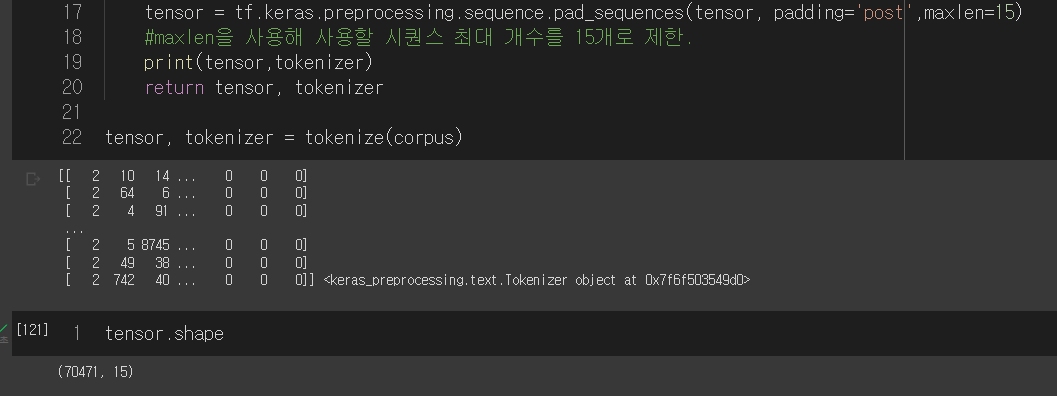

따라서 pad_sequences메서드에서 maxlen = 15라는 옵션을 굳이 설정해 줄 필요는 없을 것 같습니다.

In [136]:
src_input = tensor[:, :-1]  
tgt_input = tensor[:, 1:]    

[   2   10   14   53  447  286 1237    3    0    0    0    0    0    0
    0]
[  10   14   53  447  286 1237    3    0    0    0    0    0    0    0
    0]


In [141]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words + 1   

dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(256, 15), dtype=tf.int32, name=None), TensorSpec(shape=(256, 15), dtype=tf.int32, name=None))>

In [142]:
model.compile(loss=loss, optimizer=optimizer)
model.fit(dataset, epochs=10)

Epoch 1/10
275/275 [==============================] - 64s 228ms/step - loss: 1.8924
Epoch 2/10
275/275 [==============================] - 67s 242ms/step - loss: 1.8495
Epoch 3/10
275/275 [==============================] - 68s 248ms/step - loss: 1.8096
Epoch 4/10
275/275 [==============================] - 69s 250ms/step - loss: 1.7710
Epoch 5/10
275/275 [==============================] - 69s 250ms/step - loss: 1.7346
Epoch 6/10
275/275 [==============================] - 68s 247ms/step - loss: 1.7001
Epoch 7/10
275/275 [==============================] - 68s 246ms/step - loss: 1.6662
Epoch 8/10
275/275 [==============================] - 68s 248ms/step - loss: 1.6338
Epoch 9/10
275/275 [==============================] - 69s 250ms/step - loss: 1.6031
Epoch 10/10
275/275 [==============================] - 68s 248ms/step - loss: 1.5736


이 때 학습 시간도 별 차이가 나지 않았습니다.

### 문장 생성 및 비교

- 아래쪽이 maxlen = 15 적용시 입니다.

비교 1.

In [145]:
generate_text(model, tokenizer, init_sentence = "<start> What do")

'<start> what do you mean? <end> '

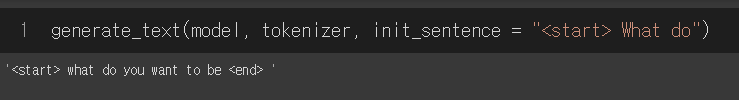

비교 2.

In [146]:
generate_text(model, tokenizer, init_sentence = "<start> sorry")

'<start> sorry i m a voodoo chile <end> '

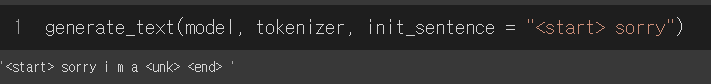

비교 3.

In [148]:
generate_text(model, tokenizer, init_sentence = "<start> I love")

'<start> i love you <end> '

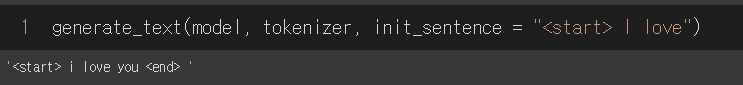

비교 4.

In [152]:
generate_text(model, tokenizer, init_sentence = "<start> I ")

'<start> i m a <unk> <end> '

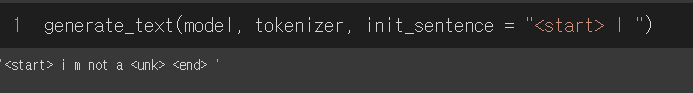

비교 5.

In [147]:
generate_text(model, tokenizer, init_sentence = "<start> Replace")

'<start> replace the <unk> <end> '

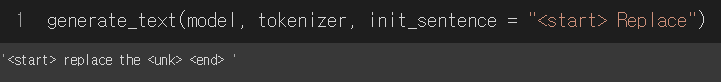

비교 6.

In [149]:
generate_text(model, tokenizer, init_sentence = "<start> You son")

'<start> you son of the <unk> <end> '

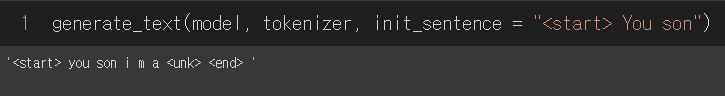

비교 7.

In [150]:
generate_text(model, tokenizer, init_sentence = "<start> Oh")

'<start> oh oh oh oh oh oh oh oh oh oh oh oh oh oh '

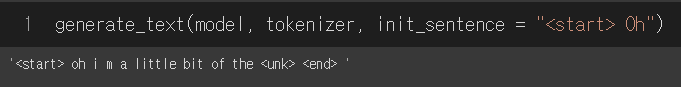

비교 8.

In [151]:
generate_text(model, tokenizer, init_sentence = "<start> This")

'<start> this is the new day <end> '

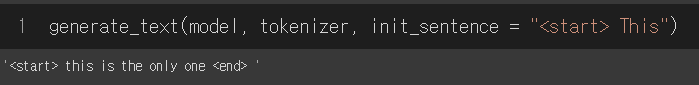

비교 9.

In [153]:
generate_text(model, tokenizer, init_sentence = "<start> You")

'<start> you re the only one that i adore <end> '

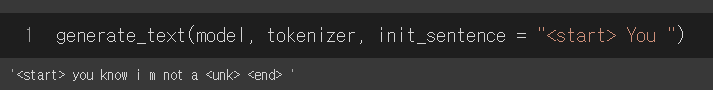

시퀀스의 크기가 1개 더 길어서인지는 모르겠지만 문장이 조금더 자연스러운 것이 많았고, 표현도 더 좋은거 같습니다.

학습에 문제도 없었음을 알 수 있습니다.

## 회고 이어서

따라서 데이터를 적절히 전처리 한다면 일부 옵션을 사용하지 않아도 됨을 알게 되었습니다. 

또한 데이터의 전처리가 모델 만큼이나 원하는 결과를 좀더 퀄리티 있게 만들어 줄 것이라는 나름의 insight 도 생겼습니다.